## Initial Code Setup

In [1]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the CSV file into Pandas
df = pd.read_csv('data/housing_data_cleaned_transposed.csv', sep=',',skiprows=0, header=0)
df_e = pd.read_csv('data/economicData.csv', sep=',', skiprows=0, header=0)
df_physical = pd.read_csv('data/housing_size_data_cleaned.csv', sep=',', index_col=0, header=0)

df_pClean = pd.DataFrame()
df_pClean['Date'] = pd.to_datetime(df_physical['Date'], format='%Y-%m-%d')
df_pClean['Date'] = pd.to_numeric(df_pClean['Date'])
df_pClean['Prices'] = df_physical['SalePrice']
df_pClean['Quality'] = df_physical['Quality']
df_pClean['Area'] = df_physical['GrLivArea']
df_pClean['GarageCars'] = df_physical['GarageCars'] 

print(df_pClean)

                     Date  Prices  Quality  Area  GarageCars
Id                                                          
1     1496275200000000000  208500        7  1710           2
2     1496275200000000000  181500        6  1262           2
3     1496275200000000000  223500        7  1786           2
4     1496275200000000000  140000        7  1717           3
5     1496275200000000000  250000        8  2198           3
...                   ...     ...      ...   ...         ...
1456  1496275200000000000  175000        6  1647           2
1457  1496275200000000000  210000        6  2073           2
1458  1496275200000000000  266500        7  2340           1
1459  1496275200000000000  142125        5  1078           1
1460  1496275200000000000  147500        5  1256           1

[1460 rows x 5 columns]


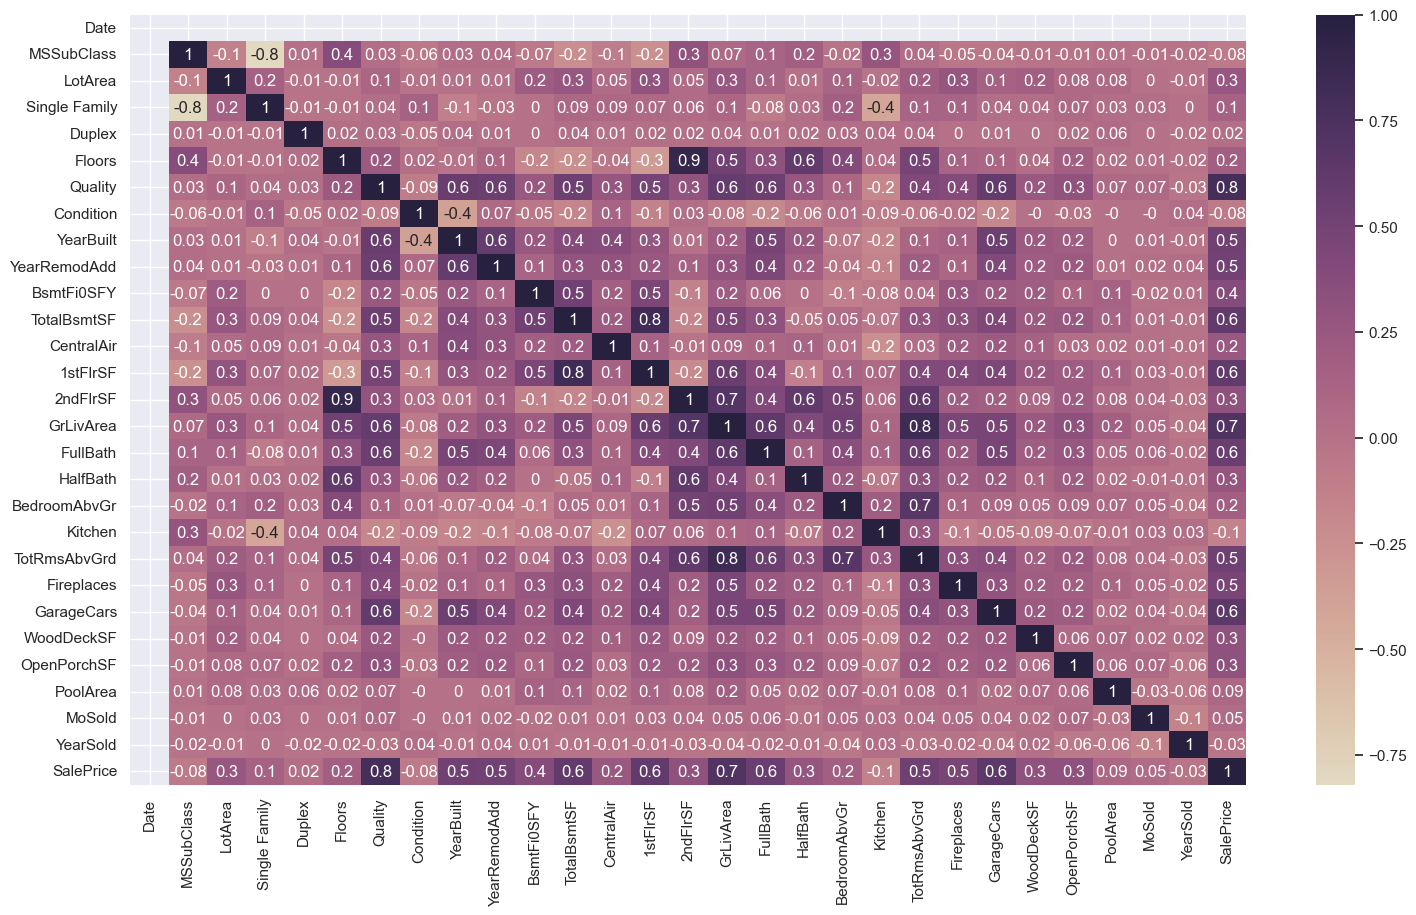

In [ ]:
# Correlation Matrix for Physical Housing Data
df_physical['Date'] = pd.to_datetime(df_physical['Date'], format='%Y-%m-%d')
df_physical['Date'] = pd.to_numeric(df_physical['Date'])

sns.set(rc={'figure.figsize':(18,10)})
correlation_matrix = df_physical.corr().round(2)
colormap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
sns.heatmap(data=correlation_matrix, annot=True, fmt='.1g', cmap=colormap)

plt.show()

In [13]:
# Join datasets to run correlation matrix
df_e = df_e.join(df['United States'])
df_e.rename(columns={'United States': 'Prices'}, inplace=True)

#df_e['Philadelphia'] = df['Philadelphia, PA']
# Note: 'ShiftedLumber' is shifted in time by 2 years to account for the leading indicator factor with prices
# Convert date string to datetime format to use in correlation matrix
df_e['Date'] = pd.to_datetime(df_e['Date'], format='%Y-%m-%d')
df_e['Date'] = pd.to_numeric(df_e['Date'])

print(df_e)

                    Date     M2MS  FedFundsRate    CPI  Eggs  Lumber  \
0     289094400000000000   1387.8         10.09   9.69  0.82  106.30   
1     297043200000000000   1423.0         10.29  10.28  0.82  109.43   
2     304992000000000000   1454.1         11.43  11.00  0.82  105.40   
3     312854400000000000   1473.7         13.78  12.76  0.82  103.63   
4     320716800000000000   1499.8         17.19  14.36  0.76   99.40   
..                   ...      ...           ...    ...   ...     ...   
149  1464739200000000000  12831.9          0.38   2.57  1.49  196.53   
150  1472688000000000000  13037.9          0.40   2.63  1.36  189.10   
151  1480550400000000000  13209.6          0.54   2.59  1.49  193.63   
152  1488326400000000000  13420.6          0.79   2.45  1.39  201.47   
153  1496275200000000000  13558.9          1.04   2.14  1.39  202.30   

     ShiftedLumber         Prices  
0           106.30   47420.325963  
1           109.43   48967.092287  
2           105.40   50031.

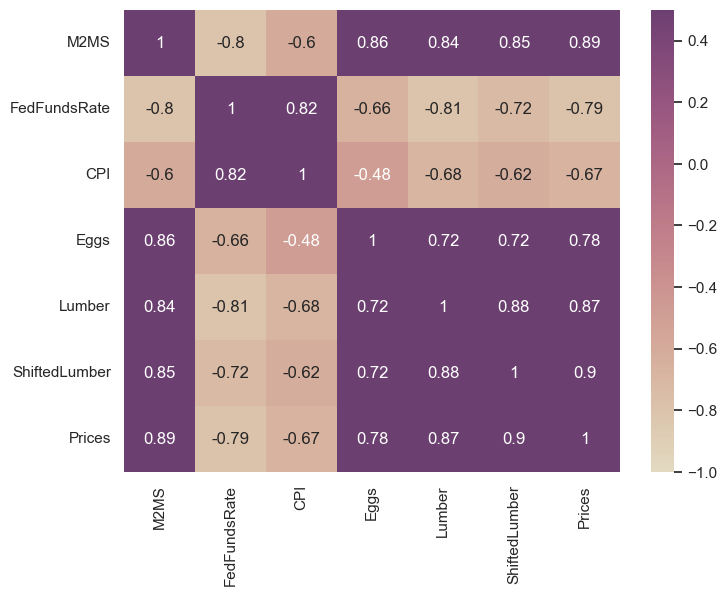

In [5]:
vars = ['M2MS', 'FedFundsRate', 'CPI', 'Eggs', 'Lumber', 'ShiftedLumber', 'Prices']
corr = df_e.corr().round(2)        
sns.set(rc={'figure.figsize':(8,6)})
colormap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
sns.heatmap(corr.loc[vars,vars], annot=True, cmap=colormap, vmax=.5, vmin=-1, center=0)
plt.show()

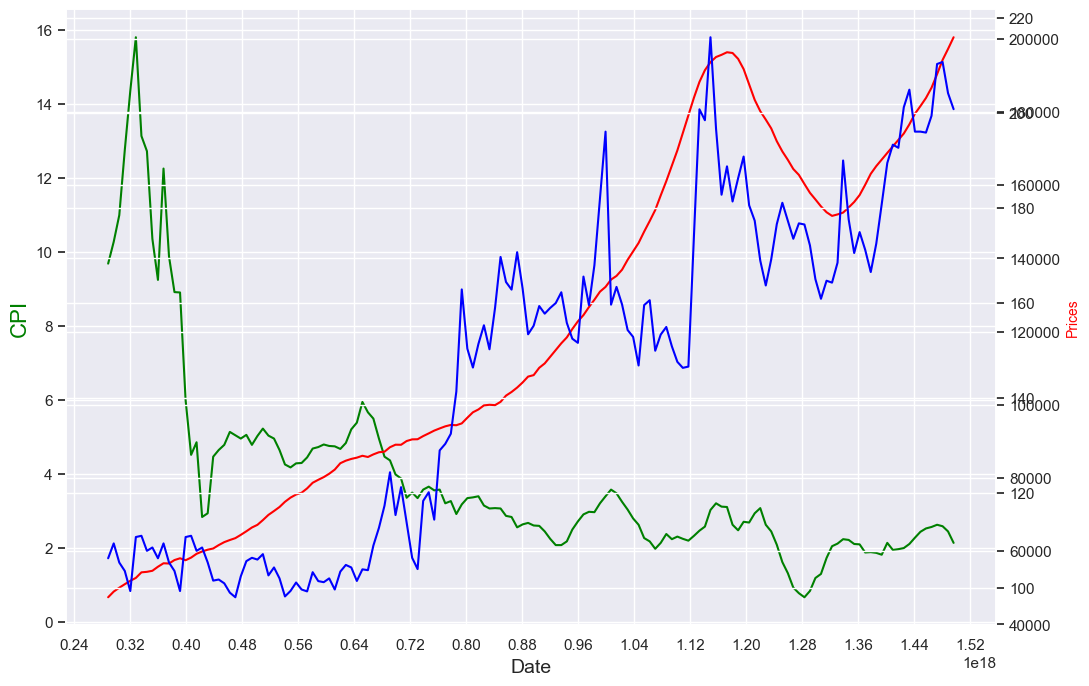

In [6]:
# Plot the rows of data as a separate line to previz to check for correlation

#define colors to use
col1 = 'green'
col2 = 'red'
col3 = 'blue'
col4 = 'black'

#define the subplots
colormap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)

fig,ax = plt.subplots(figsize=(12, 8))
ax.xaxis.set_major_locator(plt.MaxNLocator(22))


# add first dataset to plot
ax.plot(df_e.Date, df_e.CPI, color=col1)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('CPI', color=col1, fontsize=16)

# add second dataset to plot, along secondary y-axis
ax2 = ax.twinx()
ax2.plot(df_e.Date, df_e.Prices, color=col2)
ax2.set_ylabel('Prices', color=col2, fontsize=10)

# add third dataset (to secondary y-axis)
ax3 = ax.twinx()
ax3.plot(df_e.Date, df_e.ShiftedLumber, color=col3)
# ax3.set_ylabel('M2', color=col3, fontsize=10)

# add fourth dataset (to secondary y-axis)
#ax4 = ax.twinx()
#ax4.plot(df_e.Date, df_e.CPI, color=col4)
#ax4.set_ylabel('CPI', color=col4, fontsize=10)


Mean Absolute Error: $ 26,538


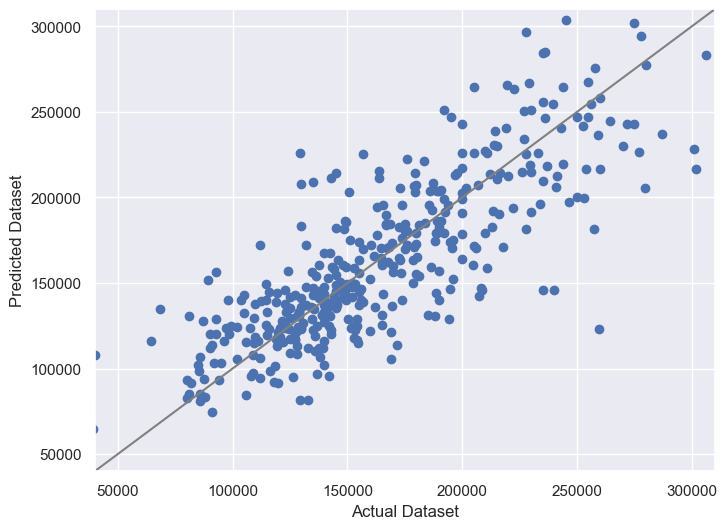

In [10]:
# Train Physical Feature Model
from IPython.display import display
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

#X1 = df_pClean[['Date', 'Quality', 'Area', 'GarageCars']]
X1 = df_pClean[['Quality', 'Area', 'GarageCars']]
y1 = df_pClean['Prices']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3)

physicalModel = RandomForestRegressor()
physicalModel.fit(X_train1, y_train1)

y_pred1 = physicalModel.predict(X_test1)

metrics.mean_absolute_error(y_test1, y_pred1)
mae1 = metrics.mean_absolute_error(y_test1, y_pred1)

print('Mean Absolute Error: $ {:,}'.format(int(mae1)))

plt.scatter(y_test1, y_pred1)
plt.xlim(40000,310000)
plt.ylim(40000,310000)
plt.ylabel('Predicted Dataset')
plt.xlabel('Actual Dataset')
plt.plot([40000,310000], [40000,310000], 'grey') #1 to 1 line

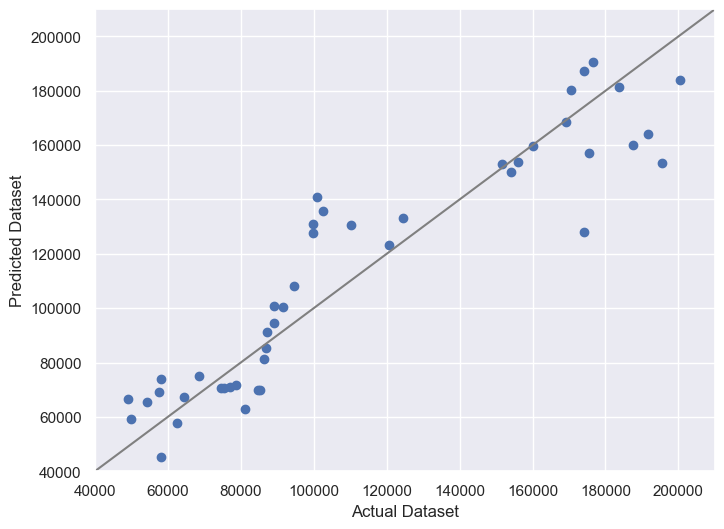

In [74]:
# Train Macroeconomic Model

from IPython.display import display
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

#X2 = df_e[['Date', 'Eggs', 'FedFundsRate', 'CPI', 'ShiftedLumber']]
X2 = df_e[['FedFundsRate', 'CPI', 'ShiftedLumber']]
y2 = df_e['Prices']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3)

#economicModel = RandomForestRegressor()
economicModel = LinearRegression()
economicModel.fit(X_train2, y_train2)

y_pred2 = economicModel.predict(X_test2)

metrics.mean_absolute_error(y_test2, y_pred2)
mae2 = metrics.mean_absolute_error(y_test2, y_pred2)

#print('Mean Absolute Error: $ {:,}'.format(int(mae2)))
plt.scatter(y_test2, y_pred2)
plt.xlim(40000,210000)
plt.ylim(40000,210000)
plt.ylabel('Predicted Dataset')
plt.xlabel('Actual Dataset')
plt.plot([40000,210000], [40000,210000], 'grey') #1 to 1 line

In [82]:
# define one new data instance
minDate =  289094400000000000
maxDate = 1496275200000000000
minPrice = 50000
maxPrice = 300000

dateRaw = '2017-03-01'
date1 = pd.to_datetime(dateRaw, format='%Y-%m-%d').timestamp()
print(f"Date: {date1} | {dateRaw}\n")

Xphy = pd.DataFrame({'Quality': [9.0], 'Area':[1500], 'GarageCars': [2]})
yphy = physicalModel.predict(Xphy)
print(f"Physical:\n {Xphy} \n")
print('Predicted Price: $ {:,}\n\n\n'.format(int(yphy)))


Xeco = pd.DataFrame({'FedFundsRate': [1], 'CPI': [2.0], 'ShiftedLumber':[225]})
yeco = economicModel.predict(Xeco)

print(f'Economic Data:\n {Xeco}\n')
print('Predicted Price: $ {:,}'.format(int(yeco)))


Date: 1488326400.0 | 2017-03-01

Physical:
    Quality  Area  GarageCars
0      9.0  1500           2 

Predicted Price: $ 271,745



Economic Data:
    FedFundsRate  CPI  ShiftedLumber
0             1  2.0            225

Predicted Price: $ 206,614
